In [1]:
#setup
import numpy as np
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
from collections import deque
import itertools

from tqdm import tqdm

import random

## Zadanie 1.
Kurs języka Python
Lista 9.
Zaprogramuj zbiór funkcji modyfikujących zadany obraz tak, aby modyfikacja była

• istotnie weselsza, tj. miała mniej koloru szarego (tj. koloru spełniającego warunek R ≈ G ≈ B). Zaproponuj jakąś strategię wskazywania koloru zastępczego na podstawie kolorów wokół obszarów szarych;

• istotnie smutniejsza, dodając więcej szarości do pierwotnego obrazka.
Pokaż obraz pierwotny i zmodyfikowany na jednym wykresie.

In [2]:
#load pics
path = 'img/windows.jpg'
img = np.array(Image.open(path))

In [3]:
def to_sad(p):
    return np.apply_along_axis(lambda rgb: (rgb + np.mean(rgb))//2, axis=2, arr=p).astype('uint8')

def to_happy(p, e=15):
    def find_closest_non_gray(is_sad, x, y):
        h, w = is_sad.shape
        visited = {(x, y)}
        queue = deque([(x, y)])
        while queue:
            x, y = queue.popleft()
            
            pos = []
            for i in range(-1, 2):
                for j in range(-1, 2):
                    pos.append((x+i, y+j))
            good = list(filter(lambda xy: 0 <= xy[0] < w and 0 <= xy[1] < h and xy not in visited, pos))
            
            for x, y in good:
                if not is_sad[y][x]:
                    return x, y
                queue.append((x, y))
                visited.add((x, y))
        return None
    
    is_sad = np.max(p, axis=2) - np.min(p, axis=2) < e
    sad_idx = np.c_[is_sad.nonzero()]

    res = np.array(p)
    
    for y, x in tqdm(sad_idx, desc='Calculating image'):
        new_x, new_y = find_closest_non_gray(is_sad, x, y)
        res[y][x] = p[new_y][new_x]

    return res

In [4]:
def add_gray_rect(n, pic, h, w):
    pic = np.array(pic)
    pic_h, pic_w, _ = pic.shape
    Xs = random.choices(np.array_split(np.arange(pic_w), pic_w//w), k=n)
    Ys = random.choices(np.array_split(np.arange(pic_h), pic_h//h), k=n)
    for i in range(n):
        X, Y = np.array(list(itertools.product(Xs[i], Ys[i]))).T
        pic[Y, X, :] = np.mean(pic[Y, X], axis=1).reshape(pic[Y, X, :].shape[0], 1)
    return pic

In [7]:
sad = to_sad(img)
image = add_gray_rect(15, img, 20, 30)
happy = to_happy(image)

Calculating image: 100%|██████████| 15663/15663 [00:17<00:00, 896.97it/s] 


Original photo


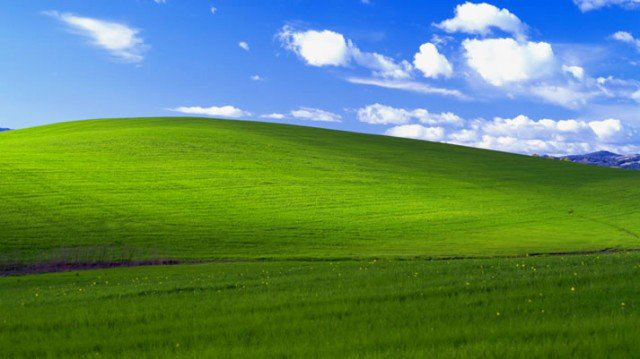

Converted to sad


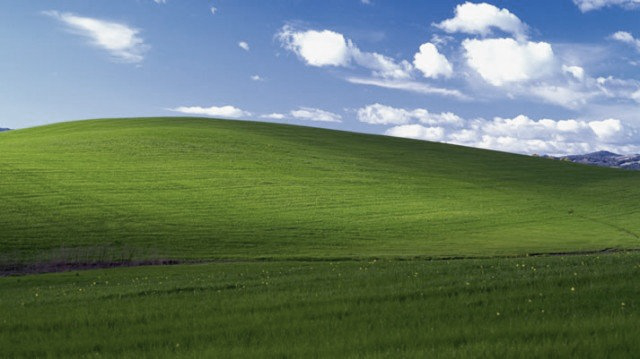

Photo with added gray rectangles


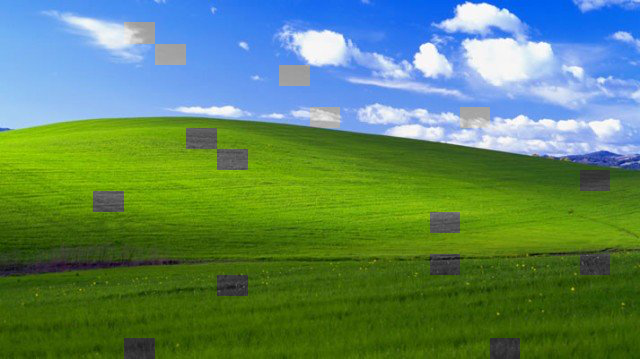

Photo with rectangles converted to happy


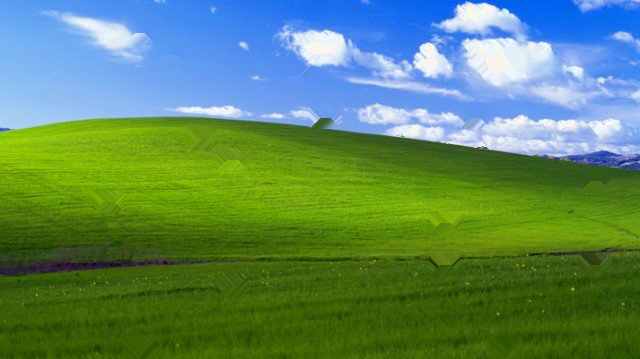

In [8]:
print('Original photo')
display(Image.fromarray(img))

print('Converted to sad')
display(Image.fromarray(sad))

print('Photo with added gray rectangles')
display(Image.fromarray(image))

print('Photo with rectangles converted to happy')
display(Image.fromarray(happy))